In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import random as rd

In [2]:
## loading data
allperUP = loadmat('allperUP.mat') ["allperUP"]
allthetaes = loadmat('allthetaes.mat') ["allthetaes"]
allbetas = loadmat('allbetas.mat') ["allbetas"]
allthetaas = loadmat('allthetaas.mat') ["allthetaas"]

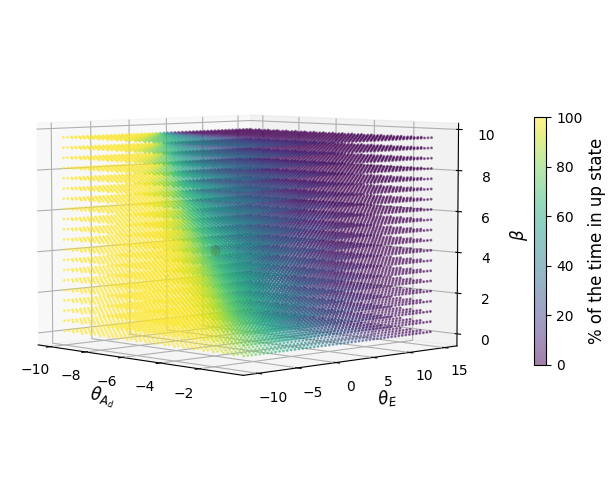

In [3]:
import numpy as np
import matplotlib.pyplot as plt

z = allbetas
x = allthetaas
y = allthetaes

X, Y, Z = np.meshgrid(x, y, z)


U = allperUP

# Creating figure
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")

# Creating plot
scatter=  ax.scatter3D(X, Y, Z, c=U, alpha=0.5, marker='.',s=5)

# Set labels for x, y, and z axes
ax.set_xlabel(r'$\theta_{A_d}$', fontsize=12)
ax.set_ylabel(r'$\theta_E$', fontsize=12)
ax.set_zlabel(r'$\beta$', fontsize=12)

cbar = fig.colorbar(scatter, fraction=0.02, pad=0.1)  # Adjust the fraction and pad as needed
cbar.set_label('% of the time in up state', fontsize=12)

ax.scatter(-9,7.5, 3.6, marker = "h", s = 50, c ="red") # plot parameter

# change view
elevation = 5
azimuth = -44
ax.view_init(elevation, azimuth)

plt.show()

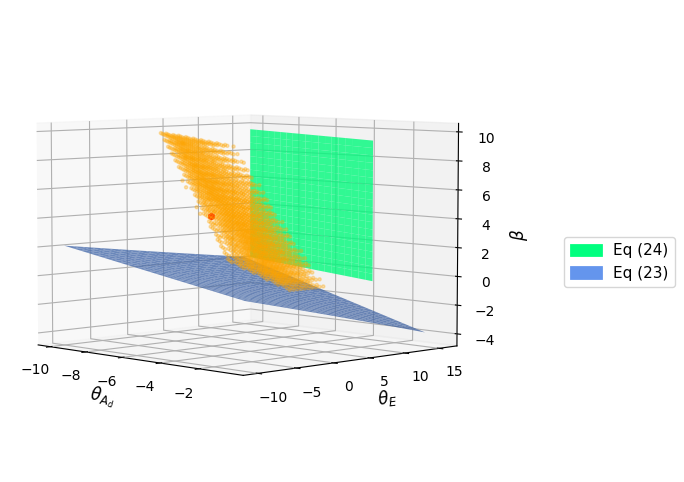

In [4]:
# everything in one

## create figure
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection ='3d')
from matplotlib.lines import Line2D
from matplotlib.patches import Circle

# data for plotting
allthetaas= allthetaas[0]
allthetaes= allthetaes[0]
allbetas = allbetas[0]

# for surface 1
eq3_arr = np.zeros((np.size(allthetaas))) # this represents thetae
for i in range(np.size(allthetaas)): 
    eq3_arr[i] = ((-7.2*allthetaas[i]) + 55.8)/8.1 

y = eq3_arr  # thetae
x = allthetaas # thetaa1
z = allbetas # beta

X, Z = np.meshgrid(x, z)
Y = np.tile(y, (len(z), 1))

surf1= ax.plot_surface(X, Y, Z, color ='springgreen',alpha =0.8)

# for surface 2
eq4_arr = np.zeros((np.size(allthetaes),np.size(allthetaas))) # this represents beta
for i in range(np.size(allthetaes)):
    for j in range(np.size(allthetaas)):
        eq4_arr [i,j] = (-9.72*allthetaes[i])/ (37.35-(0.9*allthetaas[j])) # i = thetae, j = thetaa1
    
y = allthetaes # thetae
x = allthetaas # thetaa
Z__ = eq4_arr #  beta
  
X__, Y__ = np.meshgrid(x, y)

surf2= ax.plot_surface(X__,Y__, Z__, color ='cornflowerblue',alpha = 0.8)

ax.set_xlabel(r'$\theta_{A_d}$', fontsize=12)
ax.set_ylabel(r'$\theta_E$', fontsize=12)
ax.set_zlabel(r'$\beta$', fontsize=12)

# Create proxy artists for the legend
legend_elements = [
    Circle([0], [0], color='springgreen', lw=2, label=r'Eq (24)'), # theta
    Circle([0], [0], color='cornflowerblue', lw=2, label= r'Eq (23)') # beta
]

# Add legend
ax.legend(handles=legend_elements, loc = (1.2,0.4), prop={'size': 11})


# plot only stable region
allperUP = loadmat('allperUP.mat') ["allperUP"]
allperUP_modified = allperUP
mask = np.logical_or(allperUP <= 40, allperUP >=60)
allperUP_modified[mask] = False

z = allbetas
x = allthetaas
y = allthetaes

X, Y, Z = np.meshgrid(x, y, z)

U = allperUP_modified
valid_indices = np.where(U != 0)
ax.scatter(X[valid_indices], Y[valid_indices], Z[valid_indices], c="orange", alpha=0.3, marker='.', s=20)

ax.scatter(-9,7.5, 3.6, marker = "h", s = 20, c ="red")

# azimuth= 44, elevation = 5
# Set the initial elevation and azimuth angles
elevation = 5
azimuth = -44
ax.view_init(elevation, azimuth)